In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pathlib
import os
import sys

# for selection the right path
import os,sys,inspect,pathlib
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.model_trainer_reg import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor

In [2]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

#https://joeganser.github.io/2019-01-26-superconductivity-regression/

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Superconductivty', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-p

In [3]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    return plt

In [37]:
def plot_learning_curve_own(y,model,ylim = None):
    if ylim:
        plt.ylim(*ylim)
    plt.xlabel("number of splits")
    plt.ylabel("score")
    plt.grid()
    plt.plot(y,marker = "o",label="Training score"+model)
    plt.legend()

In [4]:
datapath = get_data_path("Superconduct", "train.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Superconduct/train.csv')

In [5]:
df_raw = pd.read_csv(datapath)

df_raw = df_raw.sample(3000)

In [6]:
corr_temp = df_raw.corr()
corr_temp = np.abs(corr_temp.critical_temp)

In [7]:
corr_temp

number_of_elements       0.609223
mean_atomic_mass         0.096682
wtd_mean_atomic_mass     0.297590
gmean_atomic_mass        0.207794
wtd_gmean_atomic_mass    0.353002
                           ...   
range_Valence            0.128181
wtd_range_Valence        0.449556
std_Valence              0.197657
wtd_std_Valence          0.295602
critical_temp            1.000000
Name: critical_temp, Length: 82, dtype: float64

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 7255 to 19082
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               3000 non-null   int64  
 1   mean_atomic_mass                 3000 non-null   float64
 2   wtd_mean_atomic_mass             3000 non-null   float64
 3   gmean_atomic_mass                3000 non-null   float64
 4   wtd_gmean_atomic_mass            3000 non-null   float64
 5   entropy_atomic_mass              3000 non-null   float64
 6   wtd_entropy_atomic_mass          3000 non-null   float64
 7   range_atomic_mass                3000 non-null   float64
 8   wtd_range_atomic_mass            3000 non-null   float64
 9   std_atomic_mass                  3000 non-null   float64
 10  wtd_std_atomic_mass              3000 non-null   float64
 11  mean_fie                         3000 non-null   float64
 12  wtd_mean_fie    

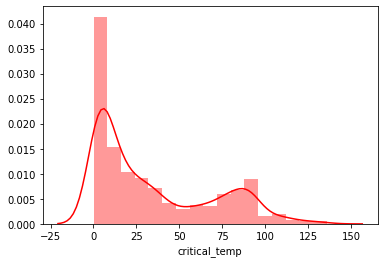

In [9]:
np.mean(df_raw["critical_temp"])
sns.distplot(df_raw["critical_temp"], color="red")

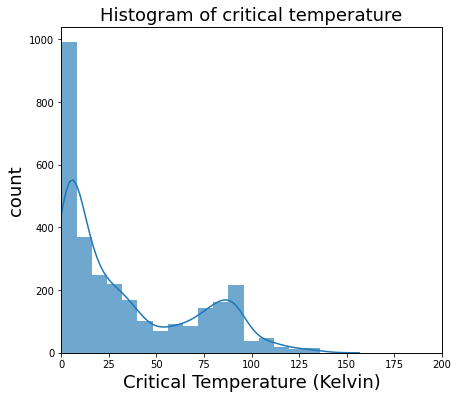

In [10]:
y = df_raw['critical_temp']
e=0.1515151515151516
y_mean = y.apply(lambda x: (x**e)).mean()
plt.figure(figsize=(15,6))
#plt.figure()
plt.subplot(1,2,1)
plt.title('Histogram of critical temperature',fontsize=18)
ax1 = sns.distplot(y, kde=False)
# Creating another Y axis
second_ax1 = ax1.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(y, ax=second_ax1, kde=True, hist=True)
#Removing Y ticks from the second axis
second_ax1.set_yticks([])
ax1.set_ylabel('count',fontsize=18)
ax1.set_xlabel('Critical Temperature (Kelvin)',fontsize=18)
plt.xlim(0,200)
plt.savefig("out/prep/temp_dist_raw.png")

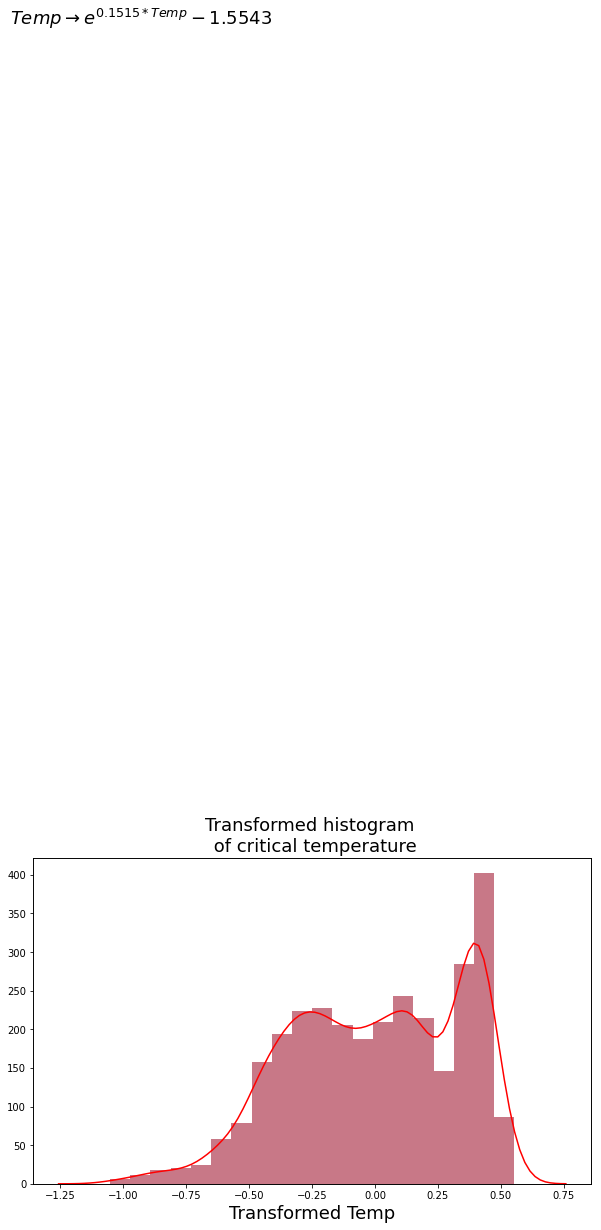

In [11]:
plt.figure(figsize=(10,6))
plt.title('Transformed histogram \n of critical temperature',fontsize=18)
transform_text = r'$Temp\rightarrow e^{0.1515*Temp}-1.5543$'
transformed = y.apply(lambda x: (x**e)-y_mean)
ax2 = sns.distplot(transformed, kde=False)
# Creating another Y axis
second_ax2 = ax2.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(transformed, ax=second_ax2, kde=True, hist=True,color='red')
#Removing Y ticks from the second axis
second_ax2.set_yticks([])
ax2.text(-1.45,1500,transform_text,fontsize=18)
ax2.set_xlabel('Transformed Temp',fontsize=18)
plt.subplots_adjust(wspace=0.2)
plt.savefig("out/prep/temp_dist_transform")
plt.show()

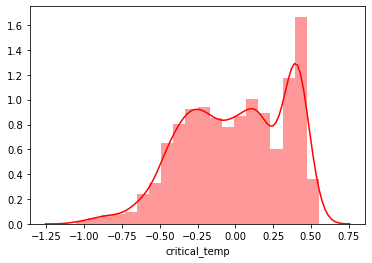

In [12]:
sns.distplot(transformed, color="red")

# Train and Test

In [13]:
#Y = df_raw.critical_temp
Y = np.array(transformed)
X = np.array(df_raw.drop("critical_temp", axis = 1))
print(X.shape)

#X_new = SelectKBest(chi2, k=2).fit_transform(X, Y)
#X_new.shape

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

(3000, 81)


## SGD-Regression

In [25]:
MODEL = SGDRegressor
NAME = "SGD"
PATH = "out/"+NAME+"/"
params = {"alpha" : [0.0001]}
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_SGD = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7328625954653789
Total evaluation time = 0.19s


,alpha,train_time,inference_time,R2_score,RMSE
0,0.0001,0.007172,0.000893,0.732863,0.030594


('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7295735874948119
Total evaluation time = 0.18s


,alpha,train_time,inference_time,R2_score,RMSE
0,0.0001,0.014184,0.004309,0.729574,0.02592


('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7275518129742427
Total evaluation time = 0.19s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.6969048253762844
Total evaluation time = 0.17s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7380368304022243
Total evaluation time = 0.20s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7125308579683765
Total evaluation time = 0.19s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7396275600805821
Total evaluation time = 0.19s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7449755756481199
Total evaluation time = 0.18s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7373575661105047
Total evaluation time = 0.19s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7500418435965416
Total evaluation time = 0.20s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7251349236313878
Total evaluation time = 0.20s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.7352619907884055
Total eval

,alpha,train_time,inference_time,R2_score,RMSE
0,0.0001,0.006121,0.000507,0.735262,0.030363


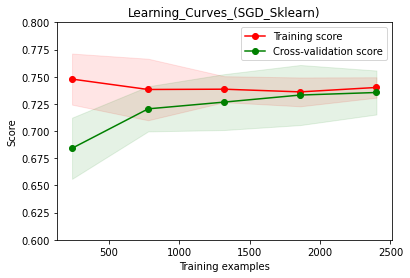

In [15]:
plt.figure()
plt.grid()

title = "Learning_Curves_(SGD_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.6, 0.8), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

In [28]:
MODEL = LinearRegression
params = {"alpha" : [0.00001], "max_iter": [1000,10000], "weigths": ["residual"]}
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_SGD_own = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation
R2_score= 0.3980310174471775
Total evaluation time = 1.89s


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE
0,0.00001,1000,residual,0.245613,0.028650,0.398031,0.068941
1,0.00001,10000,residual,1.668942,0.030541,0.398031,0.068941


('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation
R2_score= 0.4288452229291845
Total evaluation time = 1.90s


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE
0,0.00001,1000,residual,0.279971,0.009756,0.428845,0.054744
1,0.00001,10000,residual,1.702384,0.006687,0.428845,0.054744


('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation
R2_score= 0.3966250109508175
Total evaluation time = 1.89s
('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation
R2_score= 0.39908702695677334
Total evaluation time = 1.59s
('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation
R2_score= 0.4132676758153626
Total evaluation time = 1.59s
('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation
R2_score= 0.3901582708922573
Total evaluation time = 1.59s
('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation
R2_score= 0.40616995813380397
Total evaluation time = 1.68s
('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation
R2_score= 0.4023516959250998
Total evaluation time = 1.58s
('alpha', 'max_iter', 'weigths') ([1e-05], [1000, 10000], ['residual'])
Finished evaluation


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE
0,0.00001,1000,residual,0.235813,0.017515,0.413236,0.067297
1,0.00001,10000,residual,1.393726,0.018944,0.413236,0.067297


## KNN-Regression

In [30]:
MODEL = KNeighborsRegressor
params = {"weights" : ["uniform"]}
NAME = "KNN"
PATH = "out/"+NAME+"/"
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_KNN = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8204580285393612
Total evaluation time = 0.28s


,weights,train_time,inference_time,R2_score,RMSE
0,uniform,0.010891,0.161961,0.820458,0.020562


('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8368549104997408
Total evaluation time = 0.28s


,weights,train_time,inference_time,R2_score,RMSE
0,uniform,0.020224,0.059981,0.836855,0.015637


('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8338711700320932
Total evaluation time = 0.29s
('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8294749747917896
Total evaluation time = 0.29s
('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8164003707094294
Total evaluation time = 0.29s
('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.7946606971608706
Total evaluation time = 0.40s
('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8468714666253826
Total evaluation time = 0.39s
('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8415030306780464
Total evaluation time = 0.39s
('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.7994817600996574
Total evaluation time = 0.28s
('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8305092806338388
Total evaluation time = 0.28s
('weights',) (['uniform'],)
Finished evaluation
R2_score= 0.8372604681819151
Total evaluation time = 0.28s
('weights',) (['uniform'],)
Finished 

,weights,train_time,inference_time,R2_score,RMSE
0,uniform,0.015884,0.131492,0.831584,0.019316


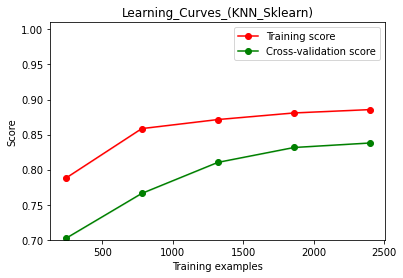

In [18]:
plt.figure()
plt.grid()

title = "Learning_Curves_(KNN_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = KNeighborsRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

In [32]:
MODEL = KNNRegressor
params = {"n_neighbors" : [5],
           "p": [2]}
NAME = "KNN"
PATH = "out/"+NAME+"/"
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_KNN_own = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8207233598246771
Total evaluation time = 1.93s


,n_neighbors,p,train_time,inference_time,R2_score,RMSE
0,5,2,0.000019,1.707156,0.820723,0.020532


('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8361911222672518
Total evaluation time = 0.59s


,n_neighbors,p,train_time,inference_time,R2_score,RMSE
0,5,2,0.00003,0.41524,0.836191,0.015701


('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8340167607671567
Total evaluation time = 0.98s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8299913014071535
Total evaluation time = 0.99s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8161524346014586
Total evaluation time = 0.99s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7947640564606266
Total evaluation time = 0.99s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8465982540650041
Total evaluation time = 0.99s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8418843205125246
Total evaluation time = 0.99s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8002513566187258
Total evaluation time = 0.99s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8306449570795318
Total evaluation time = 0.99s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8386034695040705
Total evaluation time = 0.98s
(

,n_neighbors,p,train_time,inference_time,R2_score,RMSE
0,5,2,0.000025,0.877681,0.832087,0.019258


## RF-Regression

In [34]:
MODEL = RandomForestRegressor
params = {"n_estimators" : [100]}
NAME = "RF"
PATH = "out/"+NAME+"/"
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_RF = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8617121169887964
Total evaluation time = 6.80s


,n_estimators,train_time,inference_time,R2_score,RMSE
0,100,6.639046,0.025496,0.861712,0.015838


('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8770570174749538
Total evaluation time = 10.81s


,n_estimators,train_time,inference_time,R2_score,RMSE
0,100,10.585104,0.01453,0.877057,0.011784


('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8730344650427525
Total evaluation time = 8.70s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8612367932176512
Total evaluation time = 8.80s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8610814164384007
Total evaluation time = 8.91s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8328104247491144
Total evaluation time = 9.40s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8775640850484252
Total evaluation time = 9.51s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8723869956023595
Total evaluation time = 9.70s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8534447033356788
Total evaluation time = 9.50s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8740038499841289
Total evaluation time = 11.01s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8736195622654044
Total evaluation time = 11.22s
('n_estimators',) ([100],)
Finished evaluati

,n_estimators,train_time,inference_time,R2_score,RMSE
0,100,10.756896,0.024823,0.874706,0.01437


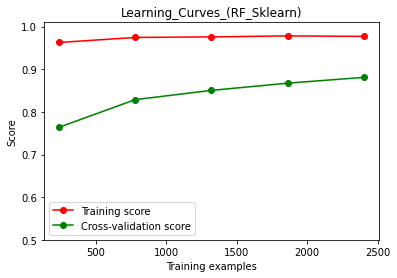

In [21]:
plt.figure()
plt.grid()

title = "Learning_Curves_(RF_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

## DT-Regression

In [36]:
MODEL = DecisionTreeRegressor
params = {"criterion": ["mse"]}
NAME = "DT"
PATH = "out/"+NAME+"/"
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_DT = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7720574608687598
Total evaluation time = 0.30s


,criterion,train_time,inference_time,R2_score,RMSE
0,mse,0.140831,0.000962,0.772057,0.026105


('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.6751562179561824
Total evaluation time = 0.39s


,criterion,train_time,inference_time,R2_score,RMSE
0,mse,0.215549,0.000463,0.675156,0.031136


('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7489420761472771
Total evaluation time = 0.40s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.738139667447943
Total evaluation time = 0.30s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7476609865905943
Total evaluation time = 0.29s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7037750351863248
Total evaluation time = 0.29s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7481367940080204
Total evaluation time = 0.39s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7694379100763156
Total evaluation time = 0.29s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7102072732125457
Total evaluation time = 0.29s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7694136078940843
Total evaluation time = 0.39s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7456910151897034
Total evaluation time = 0.29s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 

,criterion,train_time,inference_time,R2_score,RMSE
0,mse,0.175252,0.000718,0.753833,0.028233


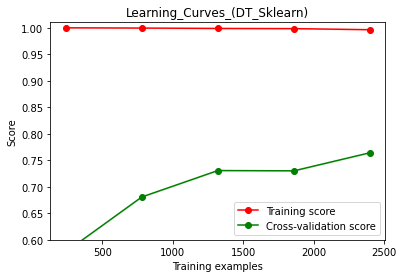

In [23]:
plt.figure()
plt.grid()

title = "Learning_Curves_(DT_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = DecisionTreeRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

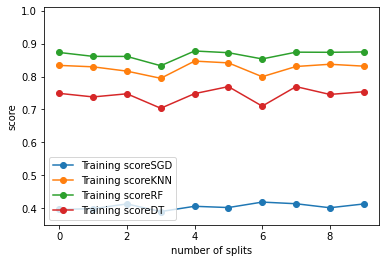

In [41]:
plot_learning_curve_own(score_list_SGD,"SGD", ylim=(0.35, 1.01))
plot_learning_curve_own(score_list_KNN,"KNN")
plot_learning_curve_own(score_list_RF,"RF")
plot_learning_curve_own(score_list_DT,"DT")
plt.savefig("out/shuffle_vs_score")

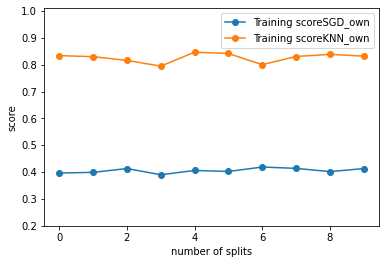

In [39]:
plot_learning_curve_own(score_list_SGD_own,"SGD_own", ylim=(0.2, 1.01))
plot_learning_curve_own(score_list_KNN_own,"KNN_own")
plt.savefig("out/shuffle_own_vs_score")